# Sample code for exercise 3-2
2017 Aug. Tsuyoshi Okubo  
2018 Dec. modified

In this code, you can perform iTEBD simulation of the ground state of spin model on 1d chain.  
$$\mathcal{H} = \sum_{i} J_z S_{i,z}S_{i+1,z} + J_{xy} (S_{i,x}S_{i+1,x} + S_{i,y}S_{i+1,y}) - h_x \sum_i S_{i,x} + D\sum_i S_{i,z}^2$$

Note that, the accuracy of the calculation depends on chi_max, tau, and iteration steps.
tau is gradually decreases from tau_max to tau_min


You can change   

- (N: # of sites. In this case, our system is infinite)
- m: size of spin  (2S = 2m + 1)  
- Jz: amplitude of SzSz interaction  
- Jxy: amplitude of SxSx + SySy interaction  
- hx : amplitude of external field alogn x direction  
- D : Single ion anisotropy  
- (periodic: In this exercize, we only consider open boundary)
- chi_max : maximum bond dimension of MPS
- tau_max : maximum value of tau
- tau_min : minimum value of tau
- T_step : Total ITE steps
- output_dyn_num : output data step

In [1]:
import numpy as np
import scipy.linalg as linalg
import TEBD
import iTEBD
from matplotlib import pyplot

In [2]:
m = 3         ## m = 2S + 1, e.g. m=3 for S=1 
Jz = 1.0      ## Jz for SzSz interaction
Jxy = 1.0     ## Jxy for SxSx + SySy interaction
hx = 0.0      ## external field along x direction
D = 0.0       ## single ion anisotropy

chi_max = 20  ## maxmum bond dimension at truncation

tau_max = 0.1     ## start imaginary time tau
tau_min = 0.001   ## final imaginary time tau
T_step=2000       ## ITE steps
output_dyn_num = 100 ## output steps

In [3]:
print("2S = m - 1, infinite spin chain")
print("m = "+repr(m))
print("Hamiltonian parameters:")
print("Jz = "+repr(Jz))
print("Jxy = "+repr(Jxy))
print("hx = "+repr(hx))
print("D = "+repr(D))

print("chi_max = "+repr(chi_max))

print("tau_max = "+repr(tau_max))
print("tau_min = "+repr(tau_min))
print("T_step = "+repr(T_step))
print("output_dyn_num = "+repr(output_dyn_num))

2S = m - 1, infinite spin chain
m = 3
Hamiltonian parameters:
Jz = 1.0
Jxy = 1.0
hx = 0.0
D = 0.0
chi_max = 20
tau_max = 0.1
tau_min = 0.001
T_step = 2000
output_dyn_num = 100


In [4]:
##iTEBD simulation
Tn, lam, T_list,E_list,mz_list = iTEBD.iTEBD_Simulation(m,Jz,Jxy,hx,D,chi_max,tau_max,tau_min,T_step,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -1.0 1.0 array([ 1., -1.])
##Dyn 1.956898387873087 -1.3873538120758777 0.5497245746995827 array([ 0.54972457, -0.54972457])
##Dyn 3.8257218398891855 -1.3965302645373625 0.31094972204003735 array([ 0.31094972, -0.31094972])
##Dyn 5.610434381147543 -1.3988822968392607 0.164278001042109 array([ 0.164278, -0.164278])
##Dyn 7.314821626228748 -1.3996004181461414 0.08553485461392935 array([ 0.08553485, -0.08553485])
##Dyn 8.942498808990797 -1.3998908581345881 0.04527341063853045 array([ 0.04527341, -0.04527341])
##Dyn 10.49691845096481 -1.4000624067944432 0.02459997774873303 array([ 0.02459998, -0.02459998])
##Dyn 11.981377684616088 -1.400194105719971 0.013763210795876647 array([ 0.01376321, -0.01376321])
##Dyn 13.399025247004122 -1.4003073511550577 0.007941865230584454 array([ 0.00794187, -0.00794187])
##Dyn 14.752868158676053 -1.4004086519759522 0.004736176682727571 array([ 0.00473618, -0.00473618])
##Dyn 16.045778101960416 -1.4005004592860977 0.002927769631866214 array([ 0.002927

##Dyn 42.57105254887609 -1.4014570535487088 0.000266407246012743 array([ 0.00026641, -0.00026641])
##Dyn 42.61193795117866 -1.4014571733719798 0.0002664478778246142 array([ 0.00026645, -0.00026645])
##Dyn 42.650983207254136 -1.4014572839101866 0.0002664866499414479 array([ 0.00026649, -0.00026649])
##Dyn 42.688271137325515 -1.4014573859236912 0.00026652364858267006 array([ 0.00026652, -0.00026652])
##Dyn 42.723880834091766 -1.4014574801084991 0.0002665589558783506 array([ 0.00026656, -0.00026656])
##Dyn 42.757887830494 -1.4014575671018088 0.00026659265005691326 array([ 0.00026659, -0.00026659])
##Dyn 42.79036425993101 -1.4014576474870777 0.0002666248056205396 array([ 0.00026662, -0.00026662])
##Dyn 42.82137900926379 -1.401457721798644 0.00026665549365668516 array([ 0.00026666, -0.00026666])
##Dyn 42.85099786493391 -1.4014577905259507 0.0002666847818830829 array([ 0.00026668, -0.00026668])
##Dyn 42.879283652505315 -1.4014578541173977 0.0002667127348599372 array([ 0.00026671, -0.00026671

In [5]:
## Calculate Energy
Env_left,Env_right = iTEBD.Calc_Environment_infinite(Tn,lam,canonical=False)
E_mps = iTEBD.Calc_Energy_infinite(Env_left,Env_right,Tn,lam,Jz,Jxy,hx,D)

print("iTEBD energy per bond = " + repr(E_mps))

iTEBD energy per bond = -1.4014581859940116


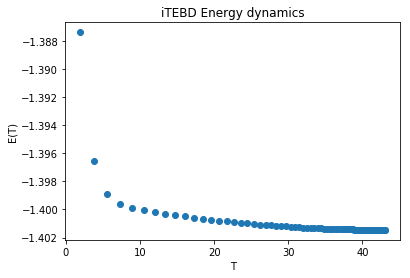

In [6]:
## plot energy dynamics
pyplot.title("iTEBD Energy dynamics")
pyplot.plot(T_list[1:],E_list[1:],"o")
pyplot.xlabel("T")
pyplot.ylabel("E(T)")
pyplot.show()
